## Rizka Putri Aulia Rusdi
## 202131068
## UAS Pembelajaran Mesin

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("DATA PENYAKIT GANGGUAN JIWA.csv")

In [6]:
data

,Unnamed: 0,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,NaN,0,Afghanistan,AFG,1990,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,NaN,1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,NaN,2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,NaN,3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,NaN,4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260
...,...,...,...,...,...,...,...,...,...,...,...,...
496,NaN,496,Barbados,BRB,2010,0.230576,0.919504,0.326282,4.666546,0.848332,2.743231,1.596516
497,NaN,497,Barbados,BRB,2011,0.230531,0.919525,0.325952,4.665952,0.846158,2.745300,1.596336
498,NaN,498,Barbados,BRB,2012,0.230445,0.919566,0.325234,4.665345,0.844594,2.746834,1.595400
499,NaN,499,Barbados,BRB,2013,0.230321,0.919632,0.324950,4.664815,0.844062,2.749714,1.593676


### Drop Data

In [46]:
pasien = data.drop(['Unnamed: 0','Drug use disorders (%)','Alcohol use disorders (%)','Eating disorders (%)','Schizophrenia (%)'], axis = 1)

In [47]:
pasien

,index,Entity,Code,Year,Bipolar disorder (%),Anxiety disorders (%),Depression (%)
0,0,Afghanistan,AFG,1990,0.697779,4.828830,4.071831
1,1,Afghanistan,AFG,1991,0.697961,4.829740,4.079531
2,2,Afghanistan,AFG,1992,0.698107,4.831108,4.088358
3,3,Afghanistan,AFG,1993,0.698257,4.830864,4.096190
4,4,Afghanistan,AFG,1994,0.698469,4.829423,4.099582
...,...,...,...,...,...,...,...
496,496,Barbados,BRB,2010,0.919504,4.666546,2.743231
497,497,Barbados,BRB,2011,0.919525,4.665952,2.745300
498,498,Barbados,BRB,2012,0.919566,4.665345,2.746834
499,499,Barbados,BRB,2013,0.919632,4.664815,2.749714


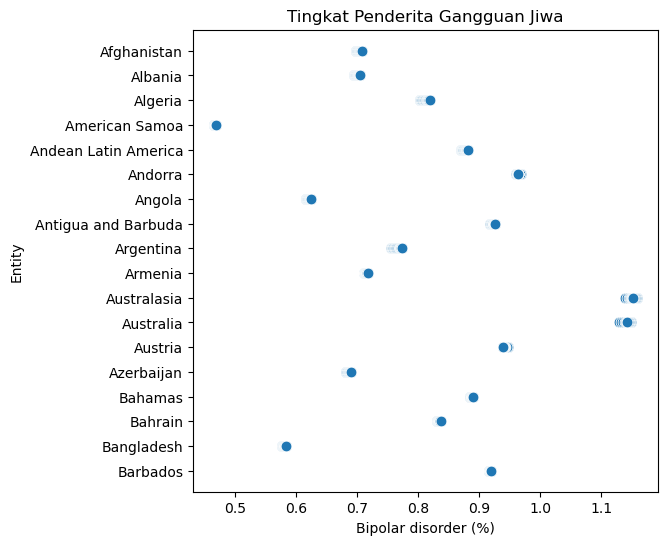

In [48]:
#persebaran data
plt.figure(figsize=(6,6))
sns.scatterplot(x = 'Bipolar disorder (%)', y = 'Entity', data = pasien, s = 60)
plt.title('Tingkat Penderita Gangguan Jiwa')
plt.show()

## Elbow Method

In [49]:
from sklearn.preprocessing import LabelEncoder
for col in ["Entity", "Code"]:
    label_encoder = LabelEncoder()
    pasien[col] = label_encoder.fit_transform(pasien[col])

In [50]:
# Assuming 'Entity' is a categorical column and 'pasien' is your DataFrame
pasien_encoded = pd.get_dummies(pasien, columns=['Entity'])

# Fill NaN values with the mean of each column
pasien_numerical = pasien_encoded.fillna(pasien_encoded.mean())

# Replace infinite values with NaN and then fill NaN values with the mean
pasien_numerical.replace([np.inf, -np.inf], np.nan, inplace=True)
pasien_numerical.fillna(pasien_numerical.mean(), inplace=True)

# Using KMeans with numeric columns
wcss = []  # List to store the within-cluster sum of squares

for i in range(1, 11):
    kmModel = KMeans(n_clusters=i, n_init=10)
    kmModel.fit(pasien_numerical)
    wcss.append(kmModel.inertia_)


C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [53]:
from sklearn.cluster import KMeans

# Menghilangkan kolom 'Entity' dan fitur kategorikal lainnya
pasien_numerical = pasien.drop(['Entity'], axis=1)

# Menggunakan KMeans dengan fitur numerik
wcss = []  # List untuk menyimpan nilai within-cluster sum of squares

for i in range(1, 11):
    kmModel = KMeans(n_clusters=i, n_init=10)
    kmModel.fit(pasien_numerical)
    wcss.append(kmModel.inertia_)

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


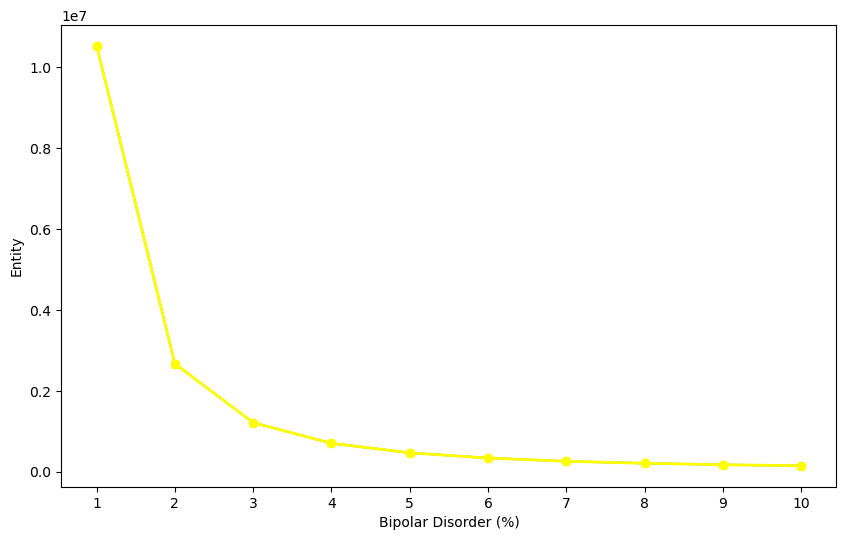

In [57]:
plt.figure(figsize = (10,6))
plt.plot(range(1,11), wcss)
plt.plot(range(1,11), wcss, linewidth = 2, color = 'Yellow', marker = '8')
plt.xlabel("Bipolar Disorder (%)")
plt.xticks(np.arange(1,11,1))
plt.ylabel("Entity")
plt.show()

In [59]:
# model dengan 5 cluster

kmModelFix = KMeans (n_clusters = 5, n_init = 10) # n_init = 10 / n_init = 'auto'
kmModelFix.fit(pasien)

hasil_prediksi = kmModelFix.predict(pasien)
hasil_prediksi

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,

In [60]:
pasien['Label'] = hasil_prediksi
pasien.head()

,index,Entity,Code,Year,Bipolar disorder (%),Anxiety disorders (%),Depression (%),Label
0,0,0,0,1990,0.697779,4.828830,4.071831,0
1,1,0,0,1991,0.697961,4.829740,4.079531,0
2,2,0,0,1992,0.698107,4.831108,4.088358,0
3,3,0,0,1993,0.698257,4.830864,4.096190,0
4,4,0,0,1994,0.698469,4.829423,4.099582,0


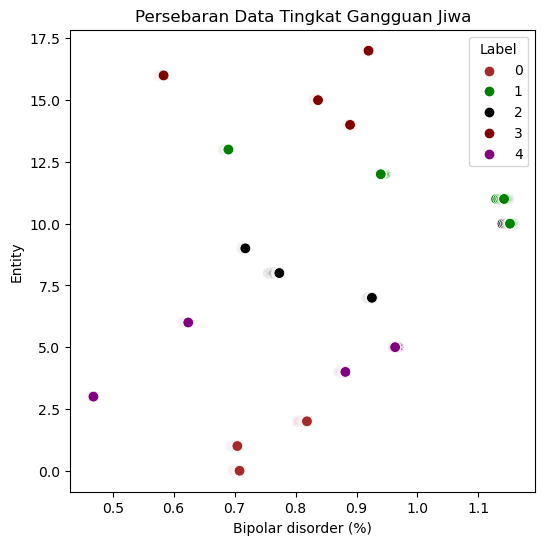

In [67]:
# Persebaran Data beserta labelnya

plt.figure(figsize=(6,6))
sns.scatterplot(x = 'Bipolar disorder (%)', y = 'Entity', hue = 'Label',
                palette = ['brown', 'green', 'black', 'Maroon', 'purple'], legend = 'full', data = pasien, s=60)
plt.title('Persebaran Data Tingkat Gangguan Jiwa')
plt.show()